## Análise de Dados  - Cardio Catch Diseases

- ` A Cadio Catch Diseases é uma empresa especializada em detecção de doenças cardíacas em estágios iniciais. O seu modelo de negócio se basea no diagnotico precoçe de  doenças cardio vasculares e tendo seu valor monetario determinado pela precisão do diagnostico. `

- ` O preço do diagnóstico, pago pelo cliente, varia de acordo com a precisão conseguida pelo laboratorio, é pago R$ 500,00 a cada 5% de acurácia acima de 50%. Por exemplo, para uma precisão de 55%, o diagnóstico custa R$ 500,00 para o cliente, para uma precisão de 60%, o valor é de R$ 1000,00 e assim por diante. Se a precisão do diagnóstico for 50% o cliente não paga por ele,porem é necessario para realizar o teste o custo de R$ 1000,00 ,logo é esperado que a precisão dos diagnosticos estejam sempre superior a 60% para manter o laboratorio. `

### Descrição das colunas:

- **Age | Objective Feature | age | int (days)**
- **Height | Objective Feature | height | int (cm) |**
- **Weight | Objective Feature | weight | float (kg) |**
- **Gender | Objective Feature | gender | categorical code |**
- **Systolic blood pressure | Examination Feature | ap_hi | int |**
- **Diastolic blood pressure | Examination Feature | ap_lo | int |**
- **Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |**
- **Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |**
- **Smoking | Subjective Feature | smoke | binary |**
- **Alcohol intake | Subjective Feature | alco | binary |**
- **Physical activity | Subjective Feature | active | binary |**
- **Presence or absence of cardiovascular disease | Target Variable | cardio | binary |**`

### Perguntas que devem ser respondidas ao CEO
- Qual a Acurácia e a Precisão da ferramenta?
    - **O modelo se encontra com 72.45% de acurácia.**
- Quanto lucro a Cardio Catch Diseases passará a ter com a nova ferramenta?
    - **Pra cada exame que for feito, a empresa terá um lucro de 2000.00 reais, pois é uma precisão 20 porcento acima da média.**
- Qual a Confiabilidade do resultado dados pela nova ferramenta?
    - **Pela constancia dos resultados**

### Bibliotecas utilizadas 

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura de dados
- Ao inciar a leitura do data set foi observado que a coluna **(age)** com as idades do pacientes estava em dias logo para deixar mais usal foi convertidade para anos.Tambem foi adicionada uma coluna com os imc de cada individuo, por mais que seja um medida ultrapassada na hora da aplicação do modelo pode vir auxiliar na decisão.Também foi observado que presença de outliers nas colunas Diastolic blood pressure,Systolic blood pressure e no Imc **(ap_hi,app_lo,imc)**, como numero de outliers não era expressivo perto da quantidade dos dados e representavem uma individuo inesistente foram removido os dados pois não representavam grande perda de informação.

In [184]:
#Adiciono a colunas de IMC no data set poremo como é necessario percorrer toda a coluna de height e wight é um processo lento.
#Logo no final estamos atualizando o data set para que so ter que fazer esse processo uma  vez.

Dados_cardio = pd.read_csv('cardio_train.csv', sep=';')
imcs = []
for dados in range(len(Dados_cardio)):
    # Converte a idade de dias para anos
    idade = Dados_cardio.iloc[dados]['age']
    Dados_cardio.at[dados,'age'] = int(idade/365)
    
    # Calculo o imc e armazena em uma lista 
    altura = Dados_cardio.iloc[dados]['height']/100
    peso = Dados_cardio.iloc[dados]['weight']
    
    imc = round(peso/(altura*altura),2)
    imcs.append(imc)    
    
Dados_cardio['imc'] = imcs
Dados_cardio.to_csv('cardio_train.csv', index = False)
Dados_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.93
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.47
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.10


### Dados Outliers

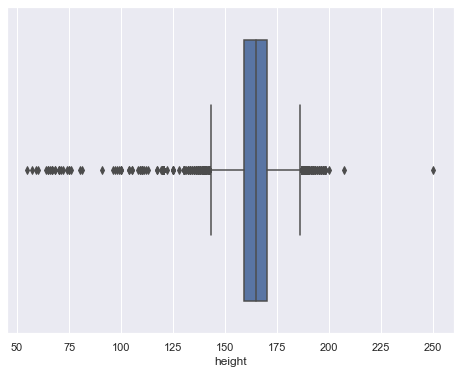

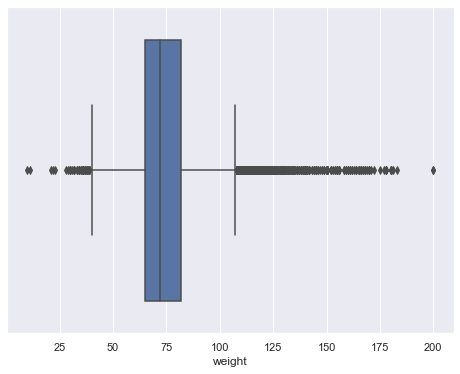

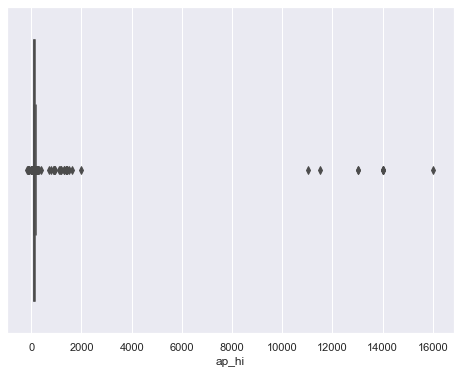

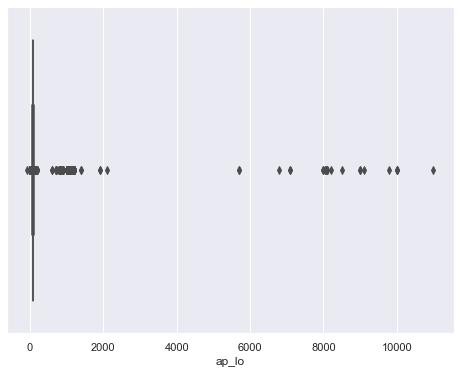

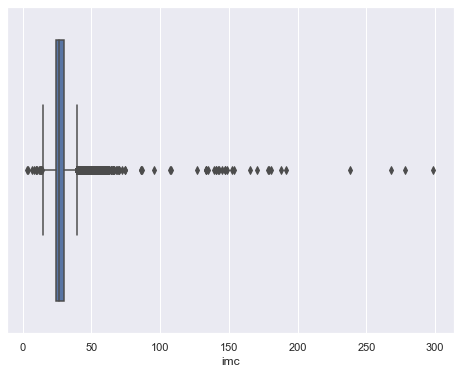

In [185]:
#Fixo apenas as colunas com info não binarias
colunas = Dados_cardio.iloc[:,[3,4,5,6,13]]
for coluna in colunas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=coluna, data=Dados_cardio)

### Filtragem
- Ao fazer uma breve pesquisa foi observado que pressão maxima que uma pessoa pode alcançar é por volta de 180 mmhg (sistólica) e para Diastólica 110 mmhg [(site usado)](http://www.saudeemmovimento.com.br/saude/tabelas/tabela_de_referencia_pressao.htm), para o imc foi um valor de 65 [(site usado)](https://pt.wikipedia.org/wiki/%C3%8Dndice_de_massa_corporal) porem para a lipesa do dados a aplicação desses valores geraria uma perda grande de informação.

<img src = "Pressão.png"  alt="Pressão" height="600" width="600"/> 
<img src = "imc.png"  alt="imc" height="400" width="400"/>

In [186]:
#Por meio do aplly geramos uma  series de true or false que é passado para o data frame como uma mascara para a filtragem.
def invalid_ap_hi(element):
    '''Filtragem da pressão sitólica'''
    if element >=60 and element<=180:
        return True
    return False
    
def invalid_ap_lo(element):
    '''Filtragem da pressão diastólica'''
    if element>=40 and element<=140:
        return True
    return False

def invalid_imc(element):
    '''Filtragem do imc'''
    if element>=14 and element<=60:
        return True
    return False

Dados_cardio_clean = Dados_cardio[Dados_cardio['ap_hi'].apply(invalid_ap_hi)]
Dados_cardio_clean = Dados_cardio_clean[Dados_cardio_clean['ap_lo'].apply(invalid_ap_lo)]
Dados_cardio_clean = Dados_cardio_clean[Dados_cardio_clean['imc'].apply(invalid_imc)]

print(len(Dados_cardio_clean))
print(len(Dados_cardio))

info = (len(Dados_cardio_clean)/len(Dados_cardio))*100
info

68397
70000


97.71

`A filtragem de dados gerou uma perca de informação de  2.29% o que é uma perda de informação aceitavel tendo em vista que os dados poderiam impactar o modelo negativamente , ainda se obeserva um numero grande de outliers porem como é uma analize bem abstrata cada paciente é unico este comportamento era esperado.`

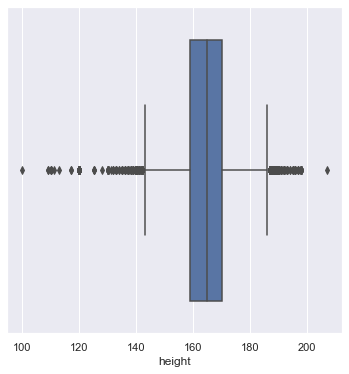

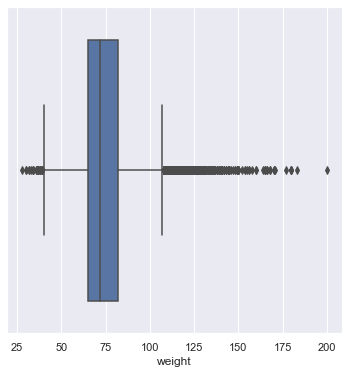

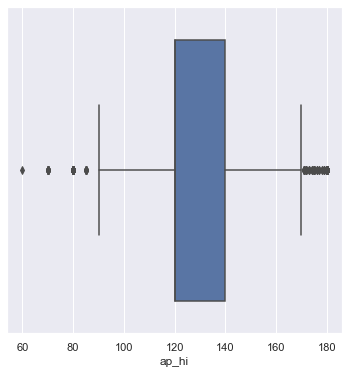

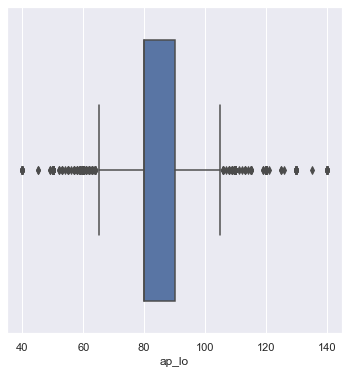

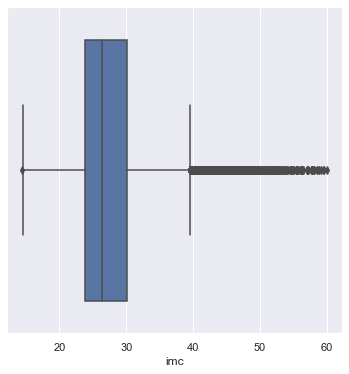

In [187]:
for coluna in colunas:
    plt.figure(figsize =(6,6))
    sns.boxplot(x = coluna, data=Dados_cardio_clean)

**1)** A proporção de homens e mulheres não mudou drasticamente.

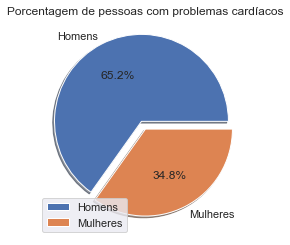

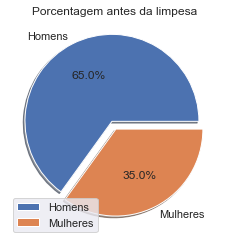

In [188]:
#Depois da limpesa 
valores = [a for a in Dados_cardio_clean['gender'].value_counts()]

explode = (0.1, 0) 

plt.pie(valores, labels=["Homens","Mulheres"],shadow=True, explode=explode, autopct='%1.1f%%')
plt.legend(["Homens","Mulheres"], loc=3)
plt.title("Porcentagem de pessoas com problemas cardíacos")
plt.show()
#Antes da limpesa 
valores_old = [a for a  in Dados_cardio['gender'].value_counts()]

explode_old = (0.1,0)

plt.pie(valores_old,labels=['Homens','Mulheres'],shadow = True, explode = explode_old ,autopct='%1.1f%%')
plt.legend(['Homens','Mulheres'],loc=3)
plt.title("Porcentagem antes da limpesa ")
plt.show()

**2)** Nas idades também com uma perda relativamente cimetrica 

<AxesSubplot:xlabel='age', ylabel='Count'>

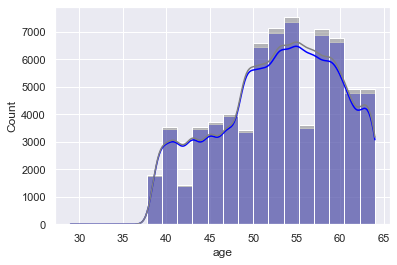

In [189]:
sns.histplot(x='age', data= Dados_cardio_clean, bins=20 ,kde=True,color='blue')
sns.histplot(x='age', data= Dados_cardio, bins=20 ,kde=True , color='grey')

**3)** Analizar quais idades tem uma maior frequencia de problemas cardiacos.

` Para mulheres temos um diagnostico da doença mais cedo pode levantar uma hipótese de que as mulheres desenvolve problemas cardiacos mais cedo que os homens.`

In [190]:
def cardio(element):
    if element == 1:
        return True
    return False

#pegando apenas os cardiacos 
true_cardio = Dados_cardio_clean[Dados_cardio_clean['cardio'].apply(cardio)]

#top 5 idades mais frequentes doenças cardiacas para mulheres 
true_cardio_m = true_cardio.loc[true_cardio.gender == 2,:].iloc[:,[1]].copy()
true_cardio_m.columns = ['age_num']
true_cardio_m = true_cardio_m.apply(pd.value_counts)
display(true_cardio_m.head(5))

#homens cardiacos idades mais frequentes
true_cardio_h = true_cardio.loc[true_cardio.gender == 1,:].iloc[:,[1]].copy()
true_cardio_h.columns=['age_num']
true_cardio_h = true_cardio_h.apply(pd.value_counts)
display(true_cardio_h.head(5))

,age_num
57,686
55,683
59,656
63,643
58,643


,age_num
59,1471
55,1418
57,1329
56,1284
63,1282


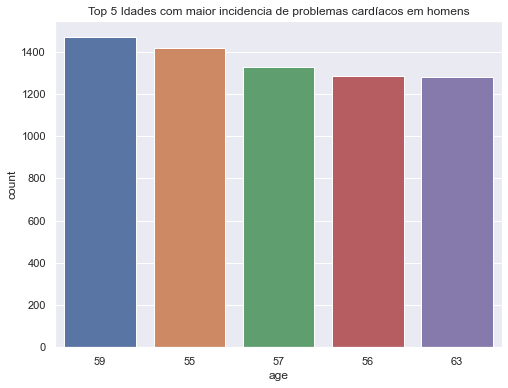

In [191]:
df_cardio = Dados_cardio_clean.query('cardio==1 and gender == 1')
age_value = df_cardio['age'].value_counts().index[:5]
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'age', data = df_cardio.query('age in @age_value'), order=age_value)
ax.set_title("Top 5 Idades com maior incidencia de problemas cardíacos em homens")

plt.show()

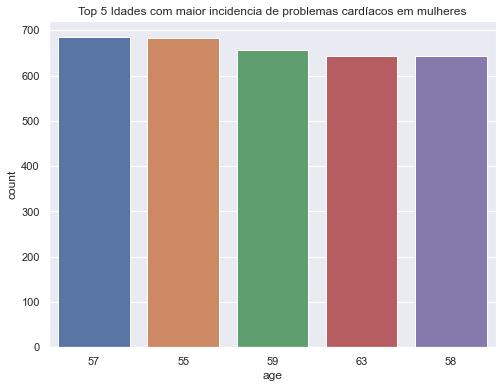

In [192]:
df_cardio = Dados_cardio_clean.query('cardio==1 and gender == 2')
age_value = df_cardio['age'].value_counts().index[:5]
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'age', data = df_cardio.query('age in @age_value'), order=age_value)
ax.set_title("Top 5 Idades com maior incidencia de problemas cardíacos em mulheres")

plt.show()

**6)**  No  atributo active (que significa praticante de atividade física), levantei uma hipótese existir alguma relação benefica ou não em o individuo ser ativo e a doença cardiaca,se o idividuo diagnosticado como cardiaco é ativo ou se o numero de ativos e não cargiacos tinha uma relação mais forte representando uma relação benefica.

- Foi constatado uma relação que os numero de individuos ativos e cardiacos é maior do que os de individuos saudaveis ativos, muito provavelmente é algo peculiar do grupo de estudo talvez as pessoas após os diagnostico se tornaram mais ativas para evitar o agravamento.
- Tabém temos uma hipótese bem mais improvavel de que o individuo que é ativo porem tem costumes em seu dia a dia que fazem esse aspecto impactar negativamente em sua saude.

In [193]:
pd.crosstab([Dados_cardio_clean['gender'],Dados_cardio_clean['active']],Dados_cardio_clean['cardio'])

cardio             0      1
gender active              
1      0        4225   4605
       1       18461  17270
2      0        2080   2536
       1        9889   9331

**7)** Pelo grafico de calor observamos que as pressões diastólicas e sistólicas tem uma relação mais forte com a cliente ser cardiaco,é algo esperado tendo em vista que as pressões são dados referentes a corrente sanguinea que sofre impacto de qualquer alteração no funcionamento do corração.

<AxesSubplot:>

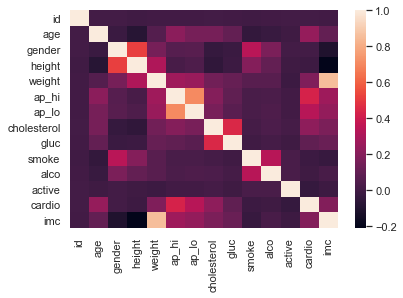

In [194]:
sns.heatmap(Dados_cardio_clean.corr())

### Modelos de machibe Learning:
**Modelo escolhido para teste:**
- Decision Tree - 73.41%

In [195]:
from sklearn.model_selection import train_test_split

x = Dados_cardio_clean[['age','gender','ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active','imc']]

y = Dados_cardio_clean['cardio'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 527)

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

modelo_arvore = DecisionTreeClassifier(max_depth=5)
modelo_arvore.fit(x_train, y_train)

previsoes = modelo_arvore.predict(x_test)

taxa_de_acerto = accuracy_score(y_test,previsoes)
print("Taxa de acertos %.2f " % (taxa_de_acerto*100))

Taxa de acertos 73.41 


In [197]:
print(modelo_arvore.score(x_train,y_train))
print(modelo_arvore.score(x_test,y_test))

0.7309062996874829
0.7340643274853801


<AxesSubplot:>

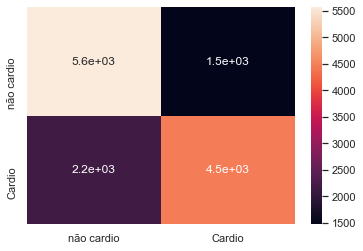

In [198]:
x = confusion_matrix(y_test,previsoes)
sns.heatmap(x,annot = True, xticklabels = ["não cardio", "Cardio"], yticklabels = ["não cardio", "Cardio"])

In [199]:
print("Precisão - Não Cardio: ")
print(100 * x[0][0] / (x[0][0] + x[1][0]), "%")

print("Precisão - Cardio: ")
print(100 * x[1][1] / (x[1][1] + x[0][1]), "%")

print("Acurácia: ")
print(100 * (x[0][0] + x[1][1]) / sum(sum(x)), "%")

Precisão - Não Cardio: 
72.02995867768595 %
Precisão - Cardio: 
75.2021563342318 %
Acurácia: 
73.40643274853801 %


In [200]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, previsoes, pos_label=1)
metrics.auc(fpr, tpr)*100

73.22544205898399

### Previsão recebendo apenas uma data frame com apenas mulheres

In [201]:
cardio_m = Dados_cardio_clean.loc[Dados_cardio_clean.gender == 2,:].iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]].copy()

x_m = cardio_m[['age','gender','ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active','imc']]

y_m = cardio_m['cardio'].values

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_m, y_m, test_size = 0.2, random_state = 527)

In [202]:
modelo_arvore = DecisionTreeClassifier(max_depth=5)
modelo_arvore.fit(x_train_m, y_train_m)

previsoes = modelo_arvore.predict(x_test_m)

taxa_de_acerto = accuracy_score(y_test_m,previsoes)
print("Taxa de acertos %.2f " % (taxa_de_acerto*100))

Taxa de acertos 72.04 


In [203]:
print(modelo_arvore.score(x_train_m,y_train_m))
print(modelo_arvore.score(x_test_m,y_test_m))

0.7315921963499056
0.7204278523489933


<AxesSubplot:>

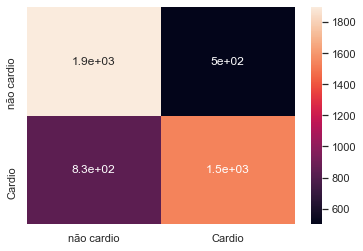

In [204]:
x = confusion_matrix(y_test_m,previsoes)
sns.heatmap(x,annot = True, xticklabels = ["não cardio", "Cardio"], yticklabels = ["não cardio", "Cardio"])

In [205]:
print("Precisão - Não Cardio: ")
print(100 * x[0][0] / (x[0][0] + x[1][0]), "%")

print("Precisão - Cardio: ")
print(100 * x[1][1] / (x[1][1] + x[0][1]), "%")

print("Acurácia: ")
print(100 * (x[0][0] + x[1][1]) / sum(sum(x)), "%")

Precisão - Não Cardio: 
69.47291361639824 %
Precisão - Cardio: 
75.49115913555993 %
Acurácia: 
72.04278523489933 %


In [206]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_m, previsoes, pos_label=1)
metrics.auc(fpr, tpr)*100

72.00363979506929

### Previsão recebendo apenas uma data frame com apenas homens 

In [207]:
cardio_h = Dados_cardio_clean.loc[Dados_cardio_clean.gender == 1,:].iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]].copy()

x_h = cardio_h[['age','gender','ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active','imc']]

y_h = cardio_h['cardio'].values

x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x_h, y_h, test_size = 0.2, random_state = 527)

In [208]:
modelo_arvore = DecisionTreeClassifier(max_depth=5)
modelo_arvore.fit(x_train_h, y_train_h)

previsoes = modelo_arvore.predict(x_test_h)

taxa_de_acerto = accuracy_score(y_test_h,previsoes)
print("Taxa de acertos %.2f " % (taxa_de_acerto*100))

Taxa de acertos 72.48 


### Testando a precisão do modelo
- Como os balores do x de treino e de teste não estão muito longe o modelo esta se saindo bem com dados que ele não conhece e com dados que ele já treino.

In [209]:
print(modelo_arvore.score(x_train_h,y_train_h))

print(modelo_arvore.score(x_test_h,y_test_h))

0.7363666965888689
0.7247840233366992


<AxesSubplot:>

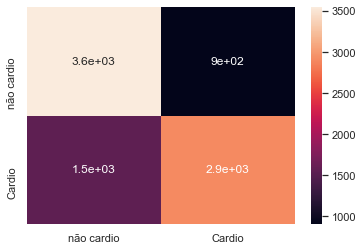

In [210]:
from sklearn.metrics import confusion_matrix 
x = confusion_matrix(y_test_h,previsoes)
sns.heatmap(x,annot = True, xticklabels = ["não cardio", "Cardio"], yticklabels = ["não cardio", "Cardio"])

In [211]:
print("Precisão - Não Cardio: ")
print(100 * x[0][0] / (x[0][0] + x[1][0]), "%")

print("Precisão - Cardio: ")
print(100 * x[1][1] / (x[1][1] + x[0][1]), "%")

print("Acurácia: ")
print(100 * (x[0][0] + x[1][1]) / sum(sum(x)), "%")

Precisão - Não Cardio: 
69.6470588235294 %
Precisão - Cardio: 
76.26540781536848 %
Acurácia: 
72.47840233366992 %


In [212]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_h, previsoes, pos_label=1)
metrics.auc(fpr, tpr)*100

72.47759258729636

## Referências: 

- [Problema Cardio Catch Diseases](https://sejaumdatascientist.com/projeto-de-data-science-diagnostico-precoce-de-doencas-cardiovasculares/)
- [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)